<a href="https://colab.research.google.com/github/mucahitrtn/Image-Processing/blob/main/Equalize_Stretch_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Histogram:
  def __init__(self, path):
    self.path = path
  
  def displayImage(self, foto, title):
    plt.title(title)
    plt.imshow(foto, cmap = 'gray')
    plt.show()
  
  def displayHistogram(self, foto, title):
    bins = []
    for i in range(256):
      bins.append(i) 
    foto = foto.reshape(-1)
    plt.title(title)
    plt.hist(foto, bins)
    plt.show()

  def openImage(self, imgPath):
    img = Image.open(imgPath)
    oneChannelImg = img.convert("L")
    return np.array(oneChannelImg)

  def histogramStretch(self, e_max,e_min,y_max, y_min):
    arr = np.arange(256)
    sub = ((y_max - y_min)/(e_max - e_min))
    for i in range(e_min, e_max+1):
      j = int((sub * (i - e_min)) + y_min)
      arr[i] = j
    return arr

  def imageStretch(self, foto, arr):
    shape = foto.shape
    foto = foto.reshape(-1)
    zeroImg = np.zeros_like(foto)
    for i, pix in enumerate(foto):
      zeroImg[i] = arr[pix]
    return zeroImg.reshape(shape).astype(np.uint8)  
  
  def stretch(self,e_max,e_min,y_max, y_min):
    foto = self.openImage(self.path)
    self.displayHistogram(foto, "Original Histogram")
    self.displayImage(foto, "Original Image")
    stretchedArr = self.histogramStretch(e_max,e_min,y_max, y_min)
    finalImage = self.imageStretch(foto, stretchedArr)
    self.displayHistogram(finalImage, "Stretched Histogram")
    self.displayImage(finalImage, "Stretched Image")  

  def createHist(self, img, L):
    hist, bins = np.histogram(img, bins = L , range=(0,L))
    return hist

  def norm_hist(self, img, L):
    hist = self.createHist(img, L)
    return hist/img.size

  def cumulativeSum(self, prr):
    return np.cumsum(prr)
  
  def equalizeHistOp(self, foto, L):
    prr = self.norm_hist(foto, L)
    k = self.cumulativeSum(prr)
    histogramEq = np.round(k*(L-1))
    shape= foto.shape
    foto1d = foto.reshape(-1)
    zeroImg = np.zeros_like(foto1d)
    for i, pix in enumerate(foto1d):
      zeroImg[i] = histogramEq[pix]
    return zeroImg.reshape(shape).astype(np.uint8)  

  def equalizeHist(self):
    L = 2**8
    foto = self.openImage(self.path)
    self.displayHistogram(foto, "Original Histogram")
    self.displayImage(foto, "Original Image") 
    finalImage = self.equalizeHistOp(foto,L)
    self.displayHistogram(finalImage, "Equalized Histogram")
    self.displayImage(finalImage, "Equalized Image")
    


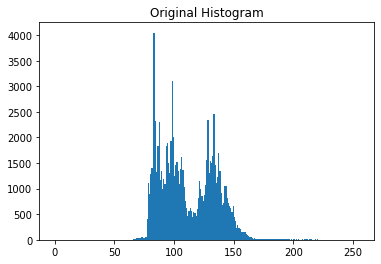

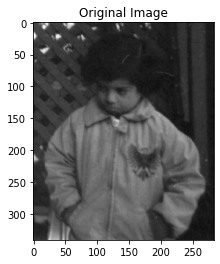

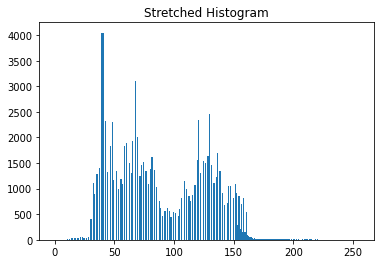

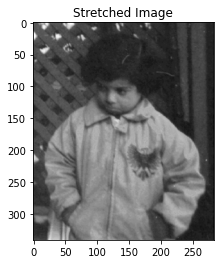

In [ ]:
h1 = Histogram("/content/1.png")
h1.stretch(150,60, 160,0) # dosya yolunu girin ve eskiMax - eskiMin, yeniMax - yeniMin aralıklarını belirtin.

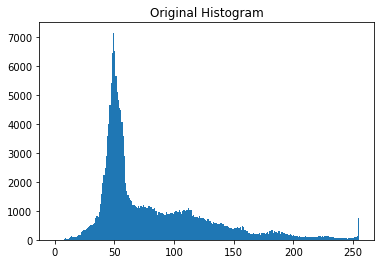

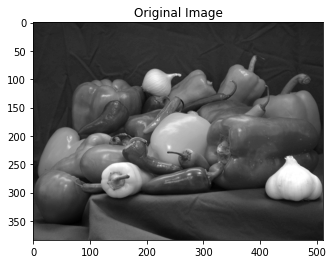

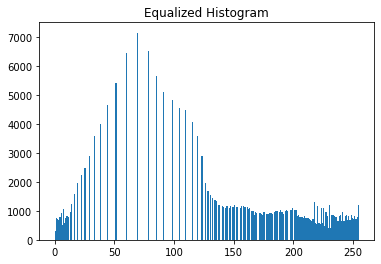

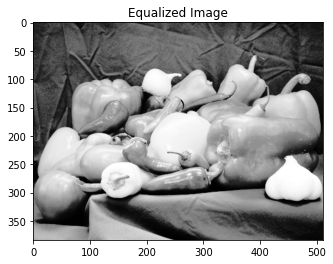

In [ ]:
h2 = Histogram("/content/indir.png")
h2.equalizeHist()